In [55]:
import h5py
import numpy as np

In [34]:
f5 = h5py.File("inpatient_readmission_analysis.hdf5", "r")

In [57]:
independent_array = f5["/independent/core_array"][...]
independent_array.shape

(66700L, 5684L)

In [58]:
independent_labels = f5["/independent/column_annotations"][...]
independent_labels[0: 10]

array(['gender_concept_name|FEMALE', 'age_at_visit_start_in_years_int',
       'No matching concept|0|C',
       'Gingival and periodontal disease|132344|C',
       'Staphylococcal scalded skin syndrome|132392|C',
       'Pressure ulcer stage 1|132393|C',
       'Post-laminectomy syndrome|132412|C',
       'Chronic osteomyelitis of hand|132414|C',
       'Congenital anomaly of skin|132446|C',
       'Contusion of scapular region|132491|C'],
      dtype='|S128')

In [59]:
dependent_array = f5["/dependent/core_array"][...]
dependent_array = np.ndarray.flatten(dependent_array)
dependent_array.shape

(66700L,)

In [76]:
np.sum(dependent_array)

6421

In [60]:
dependent_labels = f5["/dependent/column_annotations"][...]
dependent_labels

array(['30-day inpatient readmission'],
      dtype='|S128')

In [61]:
import sklearn
sklearn.__version__

'0.19.0'

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(independent_array, dependent_array, test_size=0.3)

In [64]:
X_test

array([[69,  0,  0, ...,  0,  0,  0],
       [38,  1,  0, ...,  0,  0,  0],
       [85,  0,  0, ...,  0,  0,  0],
       ..., 
       [58,  1,  0, ...,  0,  0,  0],
       [81,  1,  0, ...,  0,  0,  0],
       [66,  1,  0, ...,  0,  0,  0]])

In [44]:
from sklearn.pipeline import Pipeline

In [65]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

In [69]:
variance_thresh = VarianceThreshold()
select_k = SelectKBest(k=100)
random_forest = RandomForestClassifier()

pipeline_steps = [("remove_zero_variance", variance_thresh), 
                  ("select_features", select_k), 
                  ("random_forest", random_forest)]

In [70]:
pipeline_obj = Pipeline(pipeline_steps)

In [71]:
pipeline_obj.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('remove_zero_variance', VarianceThreshold(threshold=0.0)), ('select_features', SelectKBest(k=100, score_func=<function f_classif at 0x000000000900BCF8>)), ('random_forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='a...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [72]:
Y_predict = pipeline_obj.predict(X_test)
Y_predict[0: 100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
from sklearn.metrics import classification_report

In [74]:
report = classification_report(Y_predict, Y_test)

In [75]:
print(report)

             precision    recall  f1-score   support

          0       1.00      0.91      0.95     19974
          1       0.00      0.11      0.00        36

avg / total       1.00      0.90      0.95     20010



In [77]:
from sklearn.metrics import roc_curve

In [79]:
import matplotlib.pyplot as plt
import seaborn as sb

In [80]:
Y_test_p = pipeline_obj.predict_proba(X_test)

In [82]:
fpr, tpr, _ = roc_curve(Y_test, Y_test_p[:,1])

In [83]:
%matplotlib inline

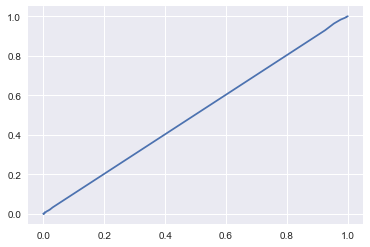

In [85]:
sb.set_style("darkgrid")
plt.plot(fpr, tpr)